In [0]:
import glob
import cv2
import os
import pandas as pd
from PIL import Image
import numpy as np
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [706]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Archive')

In [0]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('sample.csv')

train_list=list(zip(train_data['Id'], train_data['DGCI']))
test_list=list(zip(test_data['Id'], test_data['DGCI']))
test_Id=list(test_data['Id'])
train_Id=list(train_data['Id'])
train_label=train_data['DGCI']

train_dict=dict(train_list)
test_dict=dict(test_list)


#train_dict=dict(train_list)
#test_dict=dict(test_list)


train_images=[]
test_images=[]


In [0]:
train_ID=[]
test_ID=[]
train_label=[]
test_label=[]

In [0]:
import skimage.io as io
images=[]
for i in test_Id:
    img=io.imread(str(i)+'.jpg',as_grey=False)
    if (img.shape[0]!=300) or (img.shape[1]!=400):
        img=cv2.resize(img,(400,300),3)
    #img=img.reshape([300,400,3])

    test_images.append(img)
    


In [0]:
for i in train_Id:
    img=io.imread(str(i)+'.jpg',as_grey=False)
    if (img.shape[0]!=300) or (img.shape[1]!=400):
        img=cv2.resize(img,(400,300),3)
    #img=img.reshape([300,400,3])

    train_images.append(img)
    train_label.append(train_dict[i])

In [712]:
np.asarray(train_images).shape

(792, 300, 400, 3)

In [0]:
a=np.asarray(train_images)

In [714]:
np.asarray(test_images).shape

(528, 300, 400, 3)

In [0]:
x_train=np.asarray(train_images)
x_test=np.asarray(test_images)


In [0]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)

x_train = x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, train_label, test_size=0.2, random_state=13)

In [718]:
x_test.shape

(528, 300, 400, 3)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
from keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense,Dropout,BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(300,400,3)))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(alpha=0.3))
#model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(alpha=0.3))
#model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [721]:
a=model.fit(x_train, y_train,epochs=30,verbose=1,validation_data=(x_val, y_val))


Train on 633 samples, validate on 159 samples
Epoch 1/30
633/633 [==============================] - 17s 27ms/step - loss: 0.2287 - acc: 0.0000e+00 - val_loss: 0.0670 - val_acc: 0.0000e+00
Epoch 2/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0615 - acc: 0.0000e+00 - val_loss: 0.0658 - val_acc: 0.0000e+00
Epoch 3/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0571 - acc: 0.0000e+00 - val_loss: 0.0600 - val_acc: 0.0000e+00
Epoch 4/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0463 - acc: 0.0000e+00 - val_loss: 0.0693 - val_acc: 0.0000e+00
Epoch 5/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0619 - acc: 0.0000e+00 - val_loss: 0.0704 - val_acc: 0.0000e+00
Epoch 6/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0500 - acc: 0.0000e+00 - val_loss: 0.0696 - val_acc: 0.0000e+00
Epoch 7/30
633/633 [==============================] - 7s 11ms/step - loss: 0.0542 - acc: 0.0000e+00 - val_l

In [722]:
score = model.evaluate(x_val, y_val, verbose=0)
print(score)

[0.023769188297432173, 0.0]


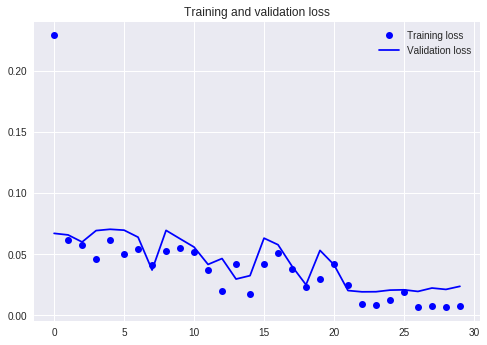

In [723]:
loss = a.history['loss']
val_loss = a.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
test_data['DGCI'] = model.predict(x_test, verbose=0)
test_data.to_csv("prediction.csv", index=False)

In [0]:
from google.colab import files
files.download( "prediction.csv" ) 